<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-7:-Writing-Functions" data-toc-modified-id="Chapter-7:-Writing-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 7: Writing Functions</a></span></li><li><span><a href="#7.1-Function-Basics" data-toc-modified-id="7.1-Function-Basics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>7.1 Function Basics</a></span></li><li><span><a href="#7.3-Documenting-Functions" data-toc-modified-id="7.3-Documenting-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>7.3 Documenting Functions</a></span></li><li><span><a href="#7.4-Function-Examples" data-toc-modified-id="7.4-Function-Examples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>7.4 Function Examples</a></span></li><li><span><a href="#7.5-Refactoring-to-Eliminate-Code-Duplication" data-toc-modified-id="7.5-Refactoring-to-Eliminate-Code-Duplication-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>7.5 Refactoring to Eliminate Code Duplication</a></span></li><li><span><a href="#7.6-Custom-Functions-vs.-Standard-Functions" data-toc-modified-id="7.6-Custom-Functions-vs.-Standard-Functions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>7.6 Custom Functions vs. Standard Functions</a></span></li><li><span><a href="#7.7-After-school-Learning" data-toc-modified-id="7.7-After-school-Learning-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>7.7 After-school Learning</a></span><ul class="toc-item"><li><span><a href="#Function-arguments-in-Python" data-toc-modified-id="Function-arguments-in-Python-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Function arguments in Python</a></span></li><li><span><a href="#Writing-user-defined-functions-in-Python" data-toc-modified-id="Writing-user-defined-functions-in-Python-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Writing user-defined functions in Python</a></span></li></ul></li></ul></div>

### Chapter 7: Writing Functions

The trick to good functions is to break down complex problems into manageable pieces.

As the number of statements within our block of code increases, the code becomes more difficult to manage and maintain.

One method of use is called *functional decomposition*, or the process of using a divide and conquer strategy to tackle complex problems.

### 7.1 Function Basics

The two aspects to every Python function:
    
   **Function definition**: contains the code that determines the functions behavior
   
   **Function invocation**: when a function is used

Every function has one definition, but it can have 1 or more invocations.

Here's what most functions look like in Python:

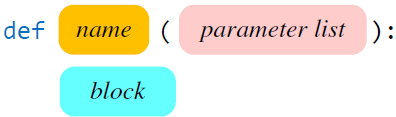

If a program contains a function definition, but it is not called, it won't run!

It is the user that must supply the function with the necessary arguments/parameters, else nothing will happen and you'll feel sad :(

A formal parameter is the parameter from the perspective of the function definition. Therefore, a function call binds the actual parameters sent by the user to their corresponding formal parameters.

While a user can pass multiple arguments into a function, a function ordinarily passes back to the user one piece of information via the **return** statement.  Function calls can also be called as part of an assignment statement.

It is not uncommon for programmers to write a **main()** controlling function that calls other functions to accomplish the work of the application.

In [54]:
def increment(x):
    print("Beginning execution of increment, x=", x)
    x = x+1
    print(f"Ending execution of increment, x={x}")

def main():
    x = 5
    print("Before increment, x=", x)
    increment(x)
    print(f"After increment, x={x}")

main()

Before increment, x= 5
Beginning execution of increment, x= 5
Ending execution of increment, x=6
After increment, x=5


### 7.3 Documenting Functions

It is always good practice to document a function's definition with information that aids programmers who may need to use/extend the use of the function.

Essential information includes:

* The purpose of the function
* The role of each parameter
* The nature of the return value

You can use comments to document your functions, but there is another way: documentation strings / docstrings.

Docstrings are begun at the top of a function definition and they are initialized via triple quotes (""").

What to include in docstrings:

* Description of the function
* Author of the function
* Date the function was last modified
* References via urls

### 7.4 Function Examples

1. Given a number, test whether it is a prime number?
    
    * Pseudocode taken from here:
    https://en.wikipedia.org/wiki/Primality_test
    
    
2. Simple confidence interval for a sample mean?

    * $\bar{x}\pm t_{\alpha/2}*\frac{s.d.}{\sqrt{n}}$
    
    * Source: Me and http://albertotb.com/Equivalence-between-distribution-functions-in-R-and-Python/
    
3. Find the middle of two points?
    * $\frac{X_{A}+X_{B}}{2}$, $\frac{Y_{A}+Y_{B}}{2}$
    
4. Given a number, find its factorial using recursion?

    * $n! = n*(n-1)*(n-2)*...*(1)$

In [15]:
#1. Inputing a number, test whether it is a prime number?
def is_prime(n):
    if n <= 3:
        return n > 1
    elif n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i*i <= n:
        if n % i == 0 or n % (i+2) == 0:
            return False
        i = i + 6
    return True

for i in range(1,10):
    print(f"The number {i} is prime: {is_prime(i)}")

The number 1 is prime: False
The number 2 is prime: True
The number 3 is prime: True
The number 4 is prime: False
The number 5 is prime: True
The number 6 is prime: False
The number 7 is prime: True
The number 8 is prime: False
The number 9 is prime: False


In [55]:
# Simple confidence interval for a mean?
#http://albertotb.com/Equivalence-between-distribution-functions-in-R-and-Python/

def CImean(mean, sd, n, conf_level=0.95):
    from scipy.stats import norm
    from math import sqrt
    tvalue = norm.ppf(conf_level+(1-conf_level)/2) # This took a bit to figure out
    LL = round(mean - (tvalue*(sd/sqrt(n))),3)
    UL = round(mean + (tvalue*(sd/sqrt(n))),3)
    print(f"t={round(tvalue,3)}")
    print(f"{conf_level*100}% confidence interval for mu is: ({LL},{UL})")

CImean(mean=5, sd=4, n=4, conf_level=0.95)

t=1.96
95.0% confidence interval for mu is: (1.08,8.92)


In [43]:
# Find the middle of two points?

def middle(x1,y1,x2,y2):
    X = (x1+x2)/2
    Y = (y1+y2)/2
    print(f"Midpoint of ({x1},{y1}) and ({x2},{y2}) is at: ({X},{Y})")

middle(0,0,1,1)

Midpoint of (0,0) and (1,1) is at: (0.5,0.5)


In [56]:
# Given a number, determine its factorial using recursion?

def factorial(n):
    if n <=1:
        return 1
    else:
        return n*factorial(n-1)
    
factorial(5)

120

### 7.5 Refactoring to Eliminate Code Duplication

https://realpython.com/python-refactoring/#code-complexity-in-python

Sometimes, you may run into the same thing, which is known as code duplication, which is undesirable because:

* Takes more work to write out the extra code

* Code becomes more difficult to maintain: Imagine having to fix a bug for every single coding duplication, that would take forever. Also, you can run the risk of introducing inconsistency into the program's behavior.

Through a process known as **code refactoring**, a programmer can place the common code within a function and tune the minor invariance in the behavior of the code via parameters.

Refactoring is the process of changing the code without changing the functionality of the program you wrote.

The two most common tasks you will perform hwen doing refactoring are:

* Renaming modules, functions, classes, and methods

* Finding usages of functions, classes, and methods to see where they are called

### 7.6 Custom Functions vs. Standard Functions

Generally speaking, if you have the choice of using a standard library function or writing your own custom function that provides the same functionality, choose to use the standard library routine.

Advantages include:

* Effort to produce a function is eliminated entirely

* You have to thoroughly test your function versus a proven method

* Standard functions are tuned to be very efficient 

* Standard functions are well-documented, your code prolly isn't as well documented

### 7.7 After-school Learning
[User-Defined Functions in Python](https://www.codementor.io/@kaushikpal/user-defined-functions-in-python-8s7wyc8k2)

The *return* statement exits a function, optionally passing back an expression to the caller. A return statement with no arguments is the same as **return None**.

#### Function arguments in Python

User-defined functions can take four different types of arguments:

* Default arguments:
    
    - Default values indicate that the function argument will take that value if no argument value is passed during a function call. The default value is assigned by using the assignment operator (=).
    
* Required arguments:
    
    - Required arguments are the mandatory arguments of a function. These values must be passed in correct number and order during a function call. Required arguments don't have a default, so their values must be supplied in the function call.
    
* Keyword arguments:

     - Keywords are mapped with the function arguments so the function can easily identify the corresponding values even if the order is not maintained during the call of the function.

* Variable number of arguments:

    - Useful for when you don't know the exact number of arguments that will be passed to the function. Usually denoted by ***args**.
    
#### Writing user-defined functions in Python

* **Step 1:** Declare the function with the key word *def* followed by the name of the function

* **Step 2:** Write the arguments inside the opening and closing parentheses of the function; end the declaration with a colon.

* **Step 3:** Add the program statements to be executed

* **Step 4:** End the function with/without a return/print statement

In [61]:
# Variable number of arguments example

def varLenArgFunc(*varlist):
    print("The output is: ")
    for var in varlist:
        print(var)

varLenArgFunc(50, 60, 70, 80)

The output is: 
50
60
70
80


In [73]:
def sum(*nums):
    sum = 0 # Start with 0
    for num in nums: # For each number in your list
        sum += num # Add the number to the current sum
    return sum
sum(1,2,3,4)

10